# Part 1 : Data Analysis - WISCONSIN DIAGNOSTIC BREAST CANCER (WDBC) DATA SET

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
dataset = pd.read_csv('./data.csv')

In [6]:
dataset.shape

(569, 32)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           567 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          568 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            568 non-null    float64
 11  fractal_dimension_mean   568 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               568 non-null    float64
 14  perimeter_se             5

In [8]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,567.000000,569.000000,568.000000,569.000000,569.000000,569.000000,568.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.877831,654.889104,0.096397,0.104341,0.088799,0.048919,0.181168,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.127261,351.914129,0.014049,0.052813,0.079720,0.038803,0.027438,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.190000,420.300000,0.086400,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095895,0.092630,0.061540,0.033500,0.179250,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,103.950000,782.700000,0.105325,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
dataset.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [11]:
dataset.tail(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039


In [12]:
dataset['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [13]:
dataset.isnull().sum(axis = 0)

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             2
area_mean                  0
smoothness_mean            1
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              1
fractal_dimension_mean     1
radius_se                  0
texture_se                 1
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             1
concavity_se               2
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [14]:
dataset = dataset.dropna()

In [15]:
dataset[dataset.select_dtypes(include=['object']).columns] = dataset.select_dtypes(include=['object']).astype('category')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 560 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       560 non-null    int64   
 1   diagnosis                560 non-null    category
 2   radius_mean              560 non-null    float64 
 3   texture_mean             560 non-null    float64 
 4   perimeter_mean           560 non-null    float64 
 5   area_mean                560 non-null    float64 
 6   smoothness_mean          560 non-null    float64 
 7   compactness_mean         560 non-null    float64 
 8   concavity_mean           560 non-null    float64 
 9   concave points_mean      560 non-null    float64 
 10  symmetry_mean            560 non-null    float64 
 11  fractal_dimension_mean   560 non-null    float64 
 12  radius_se                560 non-null    float64 
 13  texture_se               560 non-null    float64 
 14  perimeter_se   

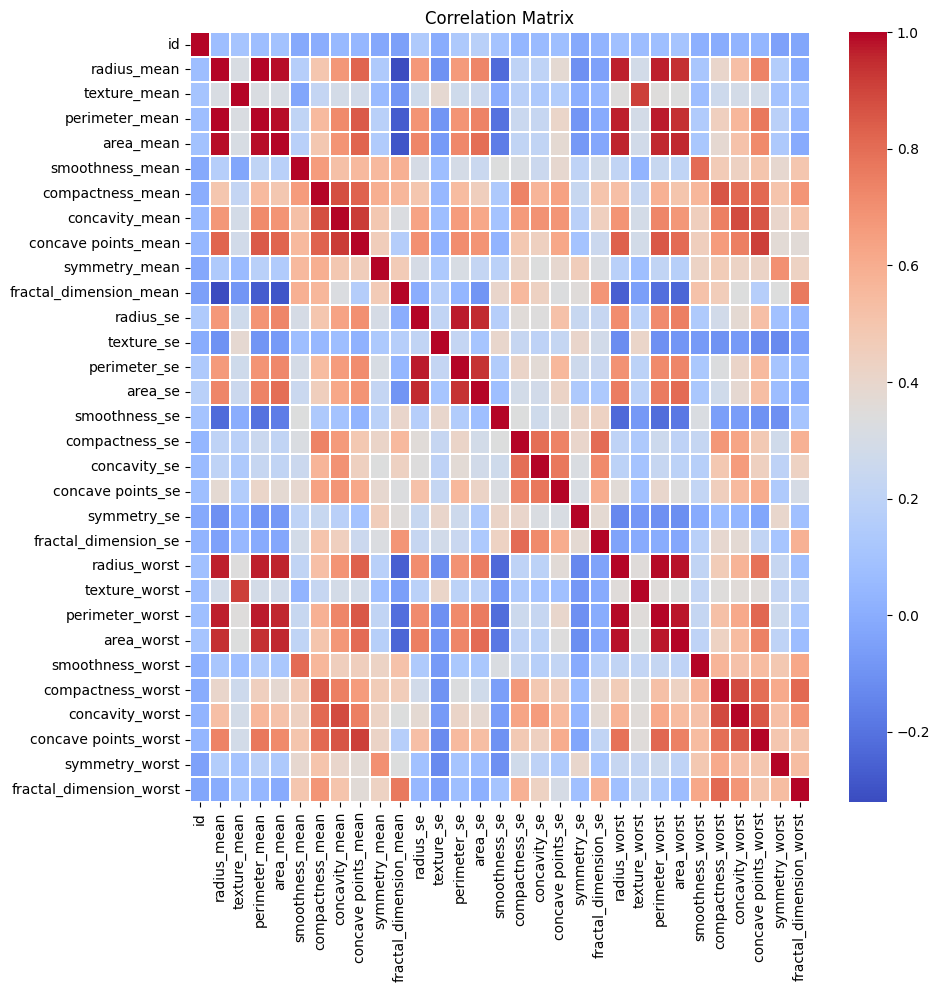

In [16]:
relative_cols = dataset.select_dtypes(include=['number'])
correlation_matrix = relative_cols.corr()
plt.figure(figsize=(10, 10))
sb.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths = 0.25)
plt.title('Correlation Matrix')
plt.show()

# Part 2 : Classification

In [17]:
X = dataset.drop(columns = 'diagnosis', axis=1)
Y = dataset['diagnosis']

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=0)

In [20]:
print("X_train Shape -", X_train.shape, "\nX_test Shape -", X_test.shape, "\nY_train Shape -", Y_train.shape, "\nY_test Shape -", Y_test.shape)

X_train Shape - (448, 31) 
X_test Shape - (112, 31) 
Y_train Shape - (448,) 
Y_test Shape - (112,)


In [21]:
from sklearn.cluster import KMeans
k = 2
kmeans = KMeans(n_clusters=k)

In [22]:
kmeans.fit(X)

KMeans(n_clusters=2)

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)

In [24]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

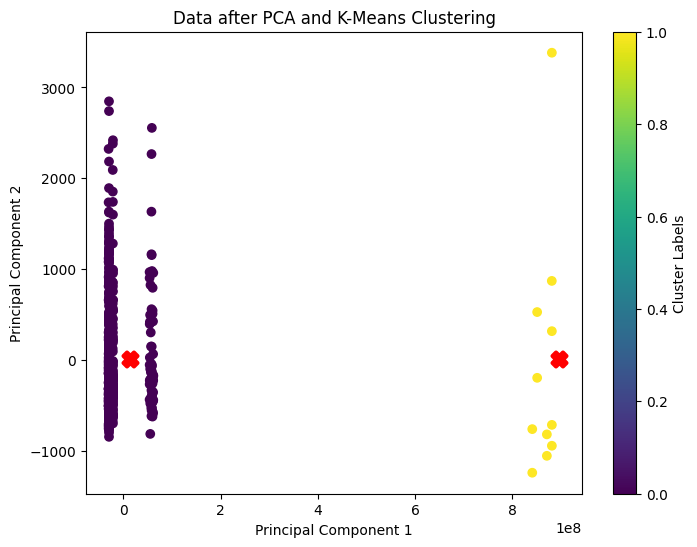

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=100, linewidths=3, color='r')
colorbar = plt.colorbar()
colorbar.set_label('Cluster Labels')
plt.title('Data after PCA and K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Model - 1 : Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
c_model1 = DecisionTreeClassifier(criterion='entropy', random_state=0)
c_model1.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [27]:
c_model1_pred = c_model1.predict(X_test)

In [28]:
c_model1_accuracy = accuracy_score(Y_test, c_model1_pred)
print(f"Accuracy of Decision Tree Classifier Model {c_model1_accuracy*100:.4f} %")

Accuracy of Decision Tree Classifier Model 96.4286 %


## Model - 2 : Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
c_model2 = LogisticRegression()
c_model2.fit(X_train, Y_train)

LogisticRegression()

In [30]:
c_model2_pred = c_model2.predict(X_test)

In [31]:
c_model2_accuracy = accuracy_score(Y_test, c_model2_pred)
print(f"Accuracy of Logistic Regression Model {c_model2_accuracy*100:.4f} %")

Accuracy of Logistic Regression Model 91.9643 %


## Model - 3 : Support Vector Machine

In [32]:
from sklearn.neighbors import KNeighborsClassifier
c_model3 = KNeighborsClassifier(n_neighbors=5)
c_model3.fit(X_train, Y_train)

KNeighborsClassifier()

In [33]:
c_model3_pred = c_model3.predict(X_test)

In [34]:
c_model3_accuracy = accuracy_score(Y_test, c_model3_pred)
print(f"Accuracy of K Nearest Neighbors Model {c_model3_accuracy*100:.4f} %")

Accuracy of K Nearest Neighbors Model 79.4643 %


In [35]:
dtc = c_model1_accuracy*100
lr = c_model2_accuracy*100
knn = c_model3_accuracy*100

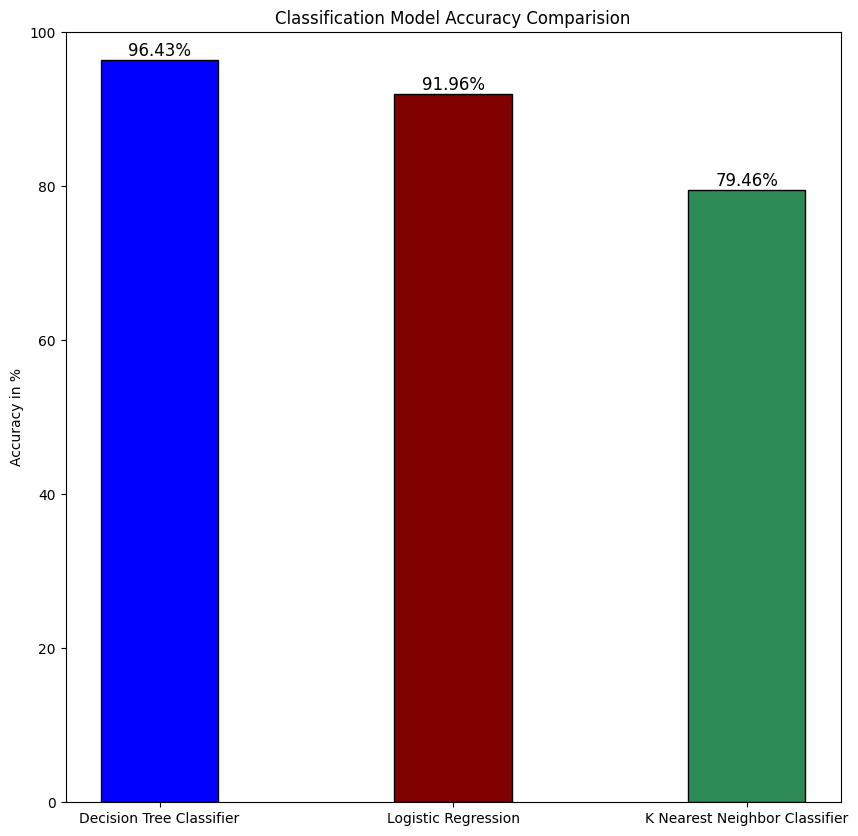

In [36]:
c_models = ['Decision Tree Classifier', 'Logistic Regression', 'K Nearest Neighbor Classifier']
c_model_accuracies = [dtc, lr, knn]
plt.figure(figsize=(10, 10))
plt.bar(c_models, c_model_accuracies, width = 0.4, edgecolor = 'black', color = ['blue', 'maroon', 'seagreen'])
plt.ylabel('Accuracy in %')
plt.title('Classification Model Accuracy Comparision')
plt.ylim(0, 100)
for i, v in enumerate(c_model_accuracies):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom', fontsize=12)
plt.show()

# Part - 3 : Regression

In [37]:
X = dataset.drop(columns = ['area_mean', 'diagnosis'], axis=1)
Y = dataset['area_mean']

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=0)

In [40]:
print("X_train Shape -", X_train.shape, "\nX_test Shape -", X_test.shape, "\nY_train Shape -", Y_train.shape, "\nY_test Shape -", Y_test.shape)

X_train Shape - (448, 30) 
X_test Shape - (112, 30) 
Y_train Shape - (448,) 
Y_test Shape - (112,)


## Model - 1 : Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
reg_model1 = LinearRegression()
reg_model1.fit(X_train, Y_train)

LinearRegression()

In [42]:
reg_model1_pred = reg_model1.predict(X_test)

In [43]:
reg_model1_mse = mean_squared_error(Y_test, reg_model1_pred)
print(f"Linear Regression Model RMSE {reg_model1_mse:.4f}")

Linear Regression Model RMSE 221.2829


## Model - 2 : Decision Tree Regression

In [44]:
from sklearn.tree import DecisionTreeRegressor
reg_model2 = DecisionTreeRegressor()
reg_model2.fit(X_train, Y_train)

DecisionTreeRegressor()

In [45]:
reg_model2_pred = reg_model2.predict(X_test)

In [46]:
reg_model2_mse = mean_squared_error(Y_test, reg_model2_pred)
print(f"Decision Tree Regression Model RMSE {reg_model2_mse:.4f}")

Decision Tree Regression Model RMSE 591.3204


## Model - 3 : Ridge Regression

In [47]:
from sklearn.linear_model import Ridge
reg_model3 = Ridge(alpha = 10e-1)
reg_model3.fit(X_train, Y_train)

Ridge()

In [48]:
reg_model3_pred = reg_model3.predict(X_test)

In [49]:
reg_model3_mse = mean_squared_error(Y_test, reg_model3_pred)
print(f"Ridge Regression Model RMSE {reg_model3_mse:.4f}")

Ridge Regression Model RMSE 280.0328


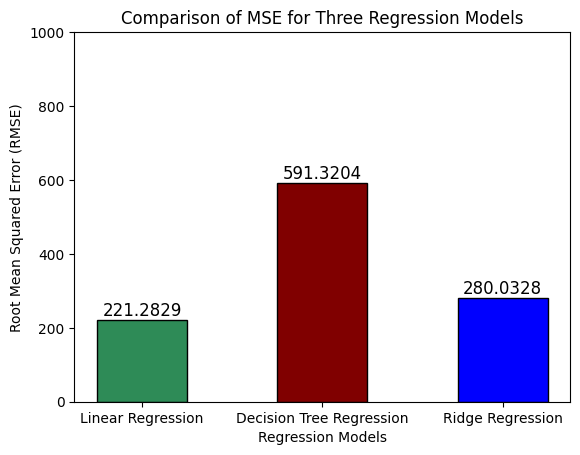

In [50]:
reg_models = ['Linear Regression', 'Decision Tree Regression', 'Ridge Regression']
rmse_values = [reg_model1_mse, reg_model2_mse, reg_model3_mse]
plt.bar(reg_models, rmse_values, align = 'center', width = 0.5, edgecolor = 'black', color=['seagreen', 'maroon', 'blue'])
plt.xlabel('Regression Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.ylim(0, 1000)
plt.title('Comparison of MSE for Three Regression Models')
for i, v in enumerate(rmse_values):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom', fontsize=12)
plt.show()